In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv("Diabetes.csv") 
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis 

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   y_pred                    768 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 57.1 KB


In [23]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_pred
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.022062
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.336697
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.099583
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.349902
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.789899
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.198701
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.198065
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.020570
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.189043
y_pred,-0.022062,0.336697,0.099583,0.349902,0.789899,0.198701,0.198065,0.020570,0.189043,1.000000


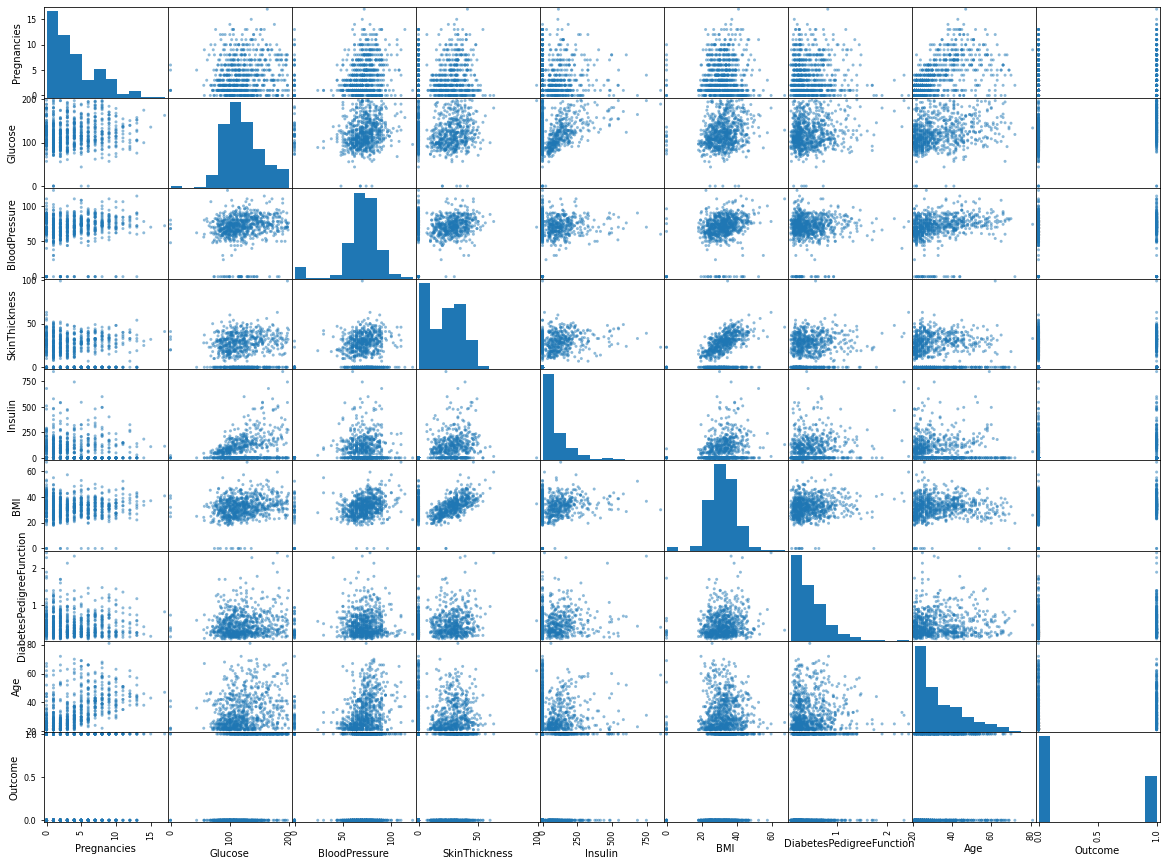

In [36]:
attributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
scatter_matrix(data[attributes], figsize=(20,15))
plt.show()

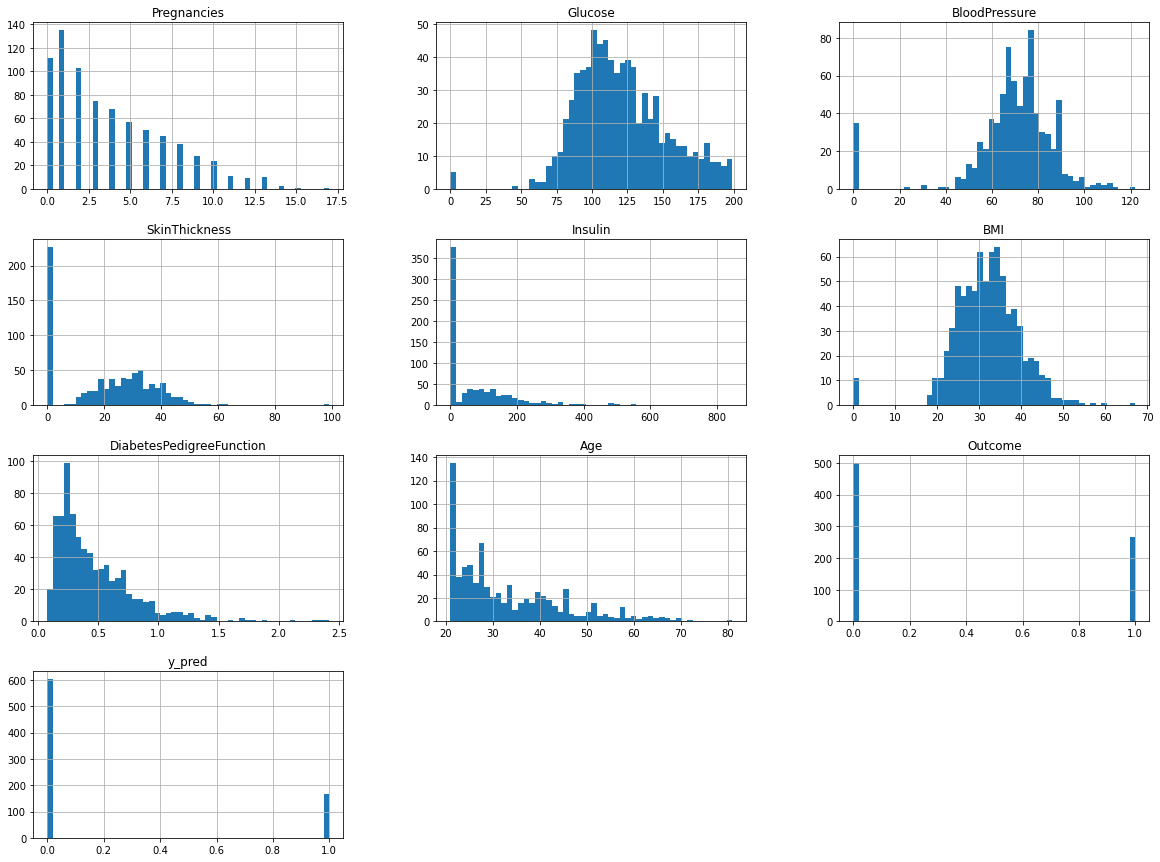

In [38]:
data.hist(bins=50, figsize=(20,15))
plt.show()

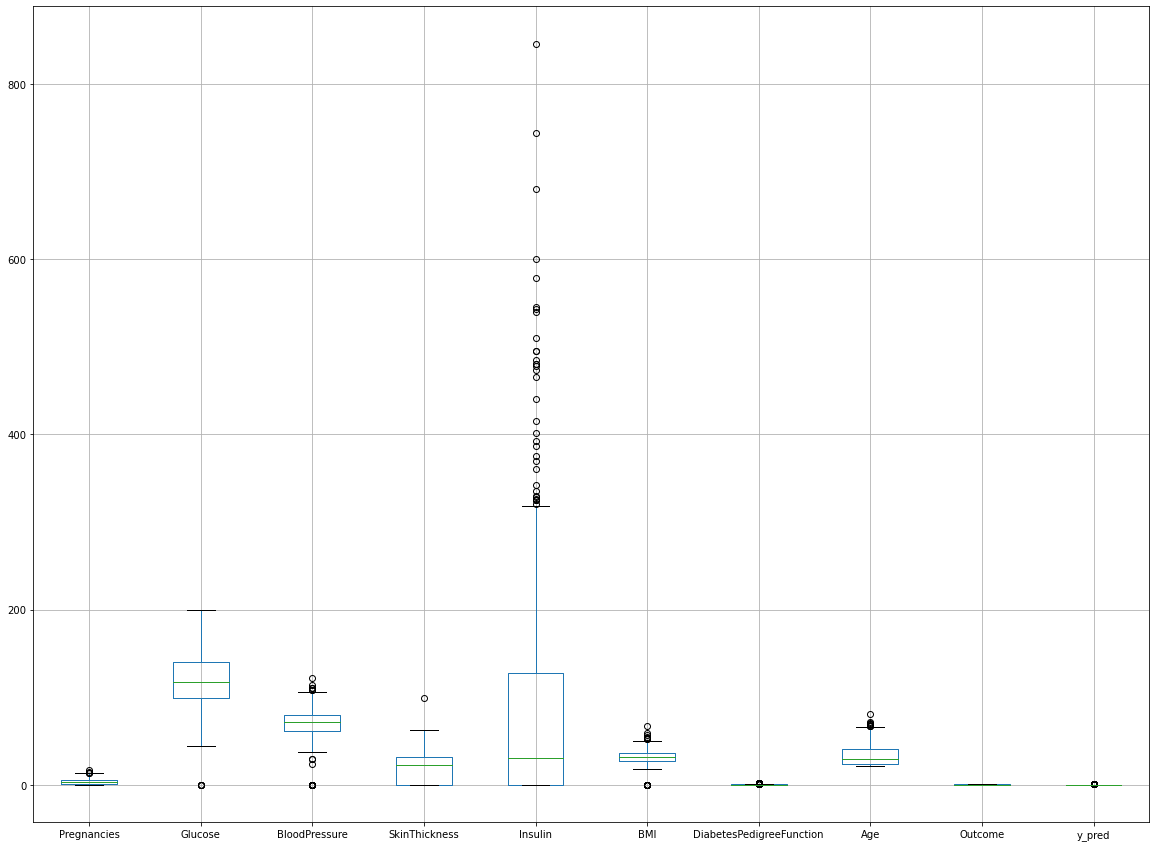

In [40]:
data.boxplot(figsize=(20,15))
plt.show()

<AxesSubplot:>

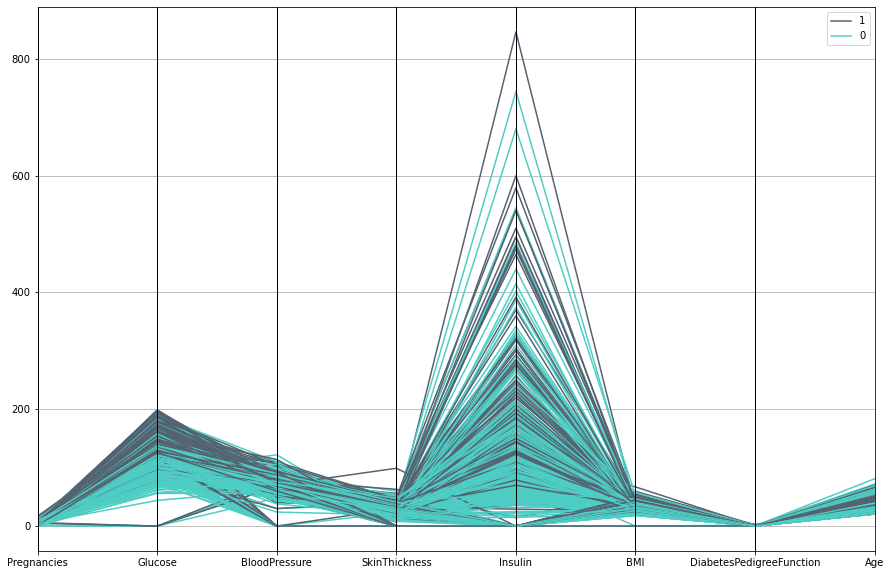

In [4]:
plt.figure(1, figsize= (15,10))
pd.plotting.parallel_coordinates(data, 'Outcome' , color=('#556270', '#4ECDC4', '#C7F464'))

# Modelado con Kmeans

In [5]:
data2 = data
data2 = data2.drop(["Outcome"],axis = 1) #borramos el outcome de el data que usaremos para el modelaje 

k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(data2)

#["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [6]:
data2 = data2.to_numpy()
# convertimos a data 2 en .numpy àra poderla dentro de un ciclo for 

In [7]:
kmeans.cluster_centers_

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ]])

### Checamos que el valor de k sea optimo

In [19]:
silhouette_score(data, kmeans.labels_)

0.5687870859521309

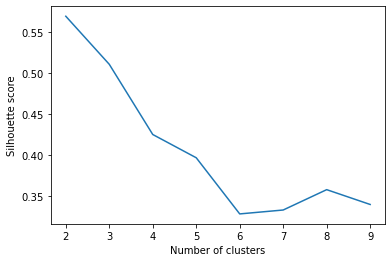

In [20]:
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    y_pred2 = kmeans.fit_predict(data)
    score = silhouette_score(data, kmeans.labels_)
    sil_scores.append(score)
plt.plot(range(2, 10), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

# Glucose and Blood Pressure

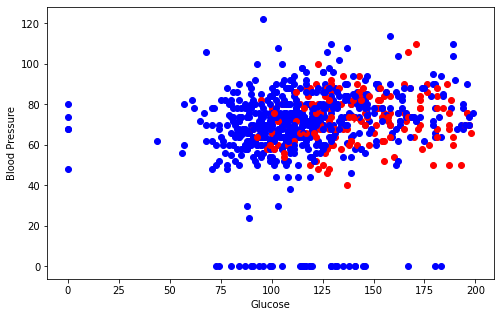

In [8]:
plt.figure(figsize= (8,5))
colors = {0: "blue", 1: "red"}
for i in range(len(data2)):
    plt.scatter(data2[i][1], data2[i][2], color=colors[y_pred[i]])
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2], marker="x", color=colors[i])
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()
#prediccion

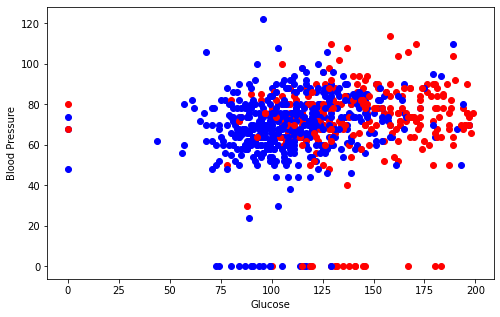

In [9]:
plt.figure(figsize= (8,5))
colors = {0: "blue", 1: "red"}
for i in range(len(data2)):
    plt.scatter(data2[i][1], data2[i][2], color=colors[data["Outcome"][i]])
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()
#original

# Skin Thickness and BMI

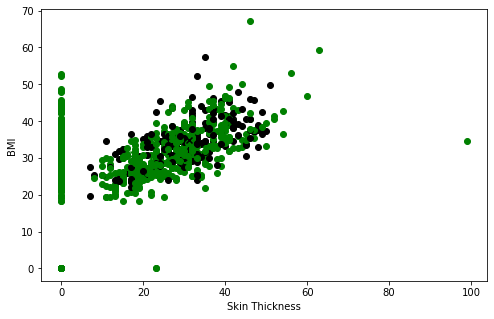

In [10]:
plt.figure(figsize= (8,5))
colors = {0: "green", 1: "black"}
for i in range(len(data2)):
    plt.scatter(data2[i][3], data2[i][5], color=colors[y_pred[i]])
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[i][3], kmeans.cluster_centers_[i][5], marker="x", color=colors[i])
plt.xlabel("Skin Thickness")
plt.ylabel("BMI")
plt.show()
#prediccion

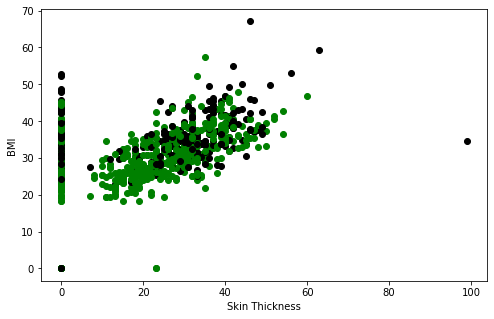

In [11]:
plt.figure(figsize= (8,5))
colors = {0: "green", 1: "black"}
for i in range(len(data2)):
    plt.scatter(data2[i][3], data2[i][5], color=colors[data["Outcome"][i]])
plt.xlabel("Skin Thickness")
plt.ylabel("BMI")
plt.show()
#original

# Diabetes Pedigree Function and Age

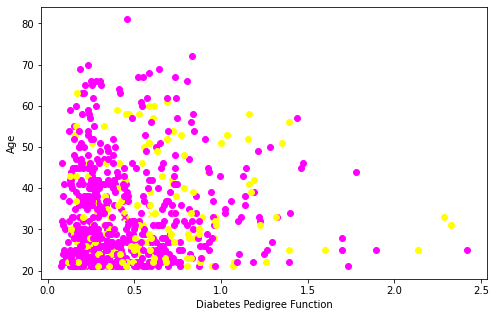

In [12]:
plt.figure(figsize= (8,5))
colors = {0: "magenta", 1: "yellow"}
for i in range(len(data2)):
    plt.scatter(data2[i][6], data2[i][7], color=colors[y_pred[i]])
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[i][6], kmeans.cluster_centers_[i][7], marker="x", color=colors[i])
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Age")
plt.show()
#prediccion

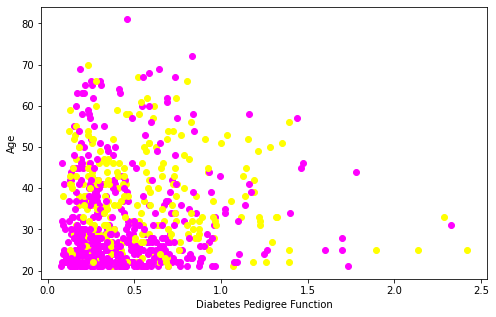

In [13]:
plt.figure(figsize= (8,5))
colors = {0: "magenta", 1: "yellow"}
for i in range(len(data2)):
    plt.scatter(data2[i][6], data2[i][7], color=colors[data["Outcome"][i]])
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Age")
plt.show()
#original

### ------------- Comparacion entre las predicciones del cluster y la columna "outcome" original -------------

In [15]:
data["y_pred"] = y_pred

In [16]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_pred
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


(array([603.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

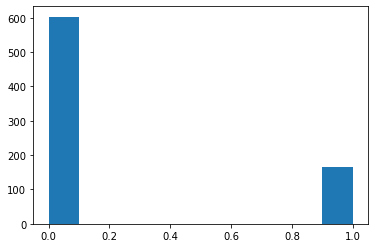

In [17]:
plt.hist(data["y_pred"])

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

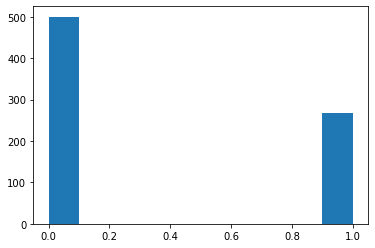

In [18]:
plt.hist(data["Outcome"])